In [1]:
"""
결측치 처리하기
- 사용하고자하는 데이터 내에 비어 있는 값이 있는 경우 처리
- 결측치 처리 순서 
    1. 결측치가 있는지 확인
    2. 결측치가 있는 경우 처리 방법
        - 해당 행 또는 컬럼 삭제
        - 특정 값으로 대체
"""

'\n결측치 처리하기\n- 사용하고자하는 데이터 내에 비어 있는 값이 있는 경우 처리\n- 결측치 처리 순서 \n    1. 결측치가 있는지 확인\n    2. 결측치가 있는 경우 처리 방법\n        - 해당 행 또는 컬럼 삭제\n        - 특정 값으로 대체\n'

In [2]:
### 라이브러리 정의
import pandas as pd

In [3]:
### 데이터 읽어들이기
# bicycle.csv 파일 읽어들이기
# 데이터프레임 변수명 : df

file_path = "./data/bicycle.csv"
# encoding : 문자타입 설정(utf-8, euc-kr, cp949 중에 되는 것 찾기)
df = pd.read_csv(file_path, encoding="euc-kr")
df  


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0
...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0


In [4]:
### 결측치 1차 확인 : 있는 것 같음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    396 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    409 non-null    float64
 9   이용시간     405 non-null    float64
 10  이용거리     404 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 36.2+ KB


In [5]:
### 결측 데이터 확인하기
# isnull() : 결측치가 있는 값들은 True로, 아닌 값들은 False로 표시됨
df.isnull()

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
415,False,False,False,False,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False,False,True,False,True
417,False,False,False,False,False,False,False,False,False,False,False
418,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.notnull()

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
415,True,True,True,True,True,True,True,True,True,True,True
416,True,True,True,True,True,True,True,True,False,True,False
417,True,True,True,True,True,True,True,True,True,True,True
418,True,True,True,True,True,True,True,True,True,True,True


In [7]:
### 컬럼별 결측치 현황 확인하기
df.isnull().sum(0)

자전거번호       0
대여일시        0
대여소번호       0
대여소명        0
대여거치대      24
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대      11
이용시간       15
이용거리       16
dtype: int64

In [8]:
### 행별로 결측치 현황 확인하기
# sum(1) :각 행별 컬럼 전체의 합
df.isnull().sum(1)

0      0
1      0
2      1
3      1
4      0
      ..
415    0
416    2
417    0
418    0
419    0
Length: 420, dtype: int64

In [10]:
"""
<결측치 처리 방법>
1. 결측치가 있는 부분의 데이터를 사용할지말지 결정
2. 사용 안한다면
    컬럼과 행 중에 어느 부분을 제거할지 결정
3. 사용한다면 
    대체하는 방법을 사용
    - 숫자 데이터인 경우 : 해당 컬럼 전체값의 평균으로 대체
    - 범주형 데이터인 경우 : 범주의 비율대비 대체
    - 무조건 0으로 대체
    - 결측데이터가 속한 행의 컬럼들과 유사한 다른 행의 데이터들의 평균으로 대체
    - 결측데이터가 속한 행 또는 열 전체 삭제
    - 결측데이터가 속한 컬럼의 직전/직후 행의 평균으로 대체 
"""

'\n<결측치 처리 방법>\n1. 결측치가 있는 부분의 데이터를 사용할지말지 결정\n2. 사용 안한다면\n    컬럼과 행 중에 어느 부분을 제거할지 결정\n3. 사용한다면 \n    대체하는 방법을 사용\n    - 숫자 데이터인 경우 : 해당 컬럼 전체값의 평균으로 대체\n    - 범주형 데이터인 경우 : 범주의 비율대비 대체\n    - 무조건 0으로 대체\n    - 결측데이터가 속한 행의 컬럼들과 유사한 다른 행의 데이터들의 평균으로 대체\n    - 결측데이터가 속한 행 또는 열 전체 삭제\n    - 결측데이터가 속한 컬럼의 직전/직후 행의 평균으로 대체 \n'

In [11]:
df

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0
...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0


In [12]:
### 결측치가 포함된 모든 컬럼 삭제하기
df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    396 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    409 non-null    float64
 9   이용시간     405 non-null    float64
 10  이용거리     404 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 36.2+ KB


In [13]:
df_drop_allcolum = df.dropna(axis=1)
df_drop_allcolum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자전거번호    420 non-null    object
 1   대여일시     420 non-null    object
 2   대여소번호    420 non-null    int64 
 3   대여소명     420 non-null    object
 4   반납일시     420 non-null    object
 5   반납대여소번호  420 non-null    int64 
 6   반납대여소명   420 non-null    object
dtypes: int64(2), object(5)
memory usage: 23.1+ KB


In [14]:
### 특정 컬럼의 결측치 데이터만 삭제하기
df["대여거치대"].dropna(axis=0)

0       3.0
1       2.0
2       1.0
3       1.0
4      11.0
       ... 
415     5.0
416    14.0
417    24.0
418    18.0
419     7.0
Name: 대여거치대, Length: 396, dtype: float64

In [15]:
### 결측치 제거 후 검증하기
df_col_1 = df["대여거치대"].dropna(axis=0)
df_col_1.isnull().sum()

0

In [16]:
### 여러개의 컬럼의 결측치가 있는 행 제거하기
# 대여소번호, 대여거치대, 이용시간 데이터 중에 결측치가 있는 행 삭제

df[["대여소번호", "대여거치대", "이용시간"]].dropna(axis=0)

,대여소번호,대여거치대,이용시간
0,646,3.0,12.0
1,646,2.0,7.0
2,646,1.0,10.0
3,646,1.0,10.0
4,512,11.0,10.0
...,...,...,...
415,112,5.0,11.0
416,103,14.0,5.0
417,113,24.0,12.0
418,152,18.0,10.0


In [17]:
### 이용거리 데[이터 중에 결측치가 있는 부분을 0으로 대체하기
df["이용거리"].fillna(0)

# df["이용거리"] = df["이용거리"].fillna(0)

0      1100.0
1      1420.0
2         0.0
3      1380.0
4      1650.0
        ...  
415    2200.0
416       0.0
417    2280.0
418    1180.0
419    8100.0
Name: 이용거리, Length: 420, dtype: float64

In [18]:
### 평균으로 대체하기
# 이용거리의 결측데이터들을 평균으로 대체하기

df["이용거리"].fillna(df["이용거리"].mean())

0      1100.000000
1      1420.000000
2      2679.678218
3      1380.000000
4      1650.000000
          ...     
415    2200.000000
416    2679.678218
417    2280.000000
418    1180.000000
419    8100.000000
Name: 이용거리, Length: 420, dtype: float64

In [21]:
### 결측치가 있는 모든 컬럼들은 각 컬럼의 평균으로 대체하여 반영시키기
df["대여거치대"] = df["대여거치대"].fillna(df["대여거치대"].mean())
df["반납거치대"] = df["반납거치대"].fillna(df["반납거치대"].mean())
df["이용시간"] = df["이용시간"].fillna(df["이용시간"].mean())
df["이용거리"] = df["이용거리"].fillna(df["이용거리"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    420 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    420 non-null    float64
 9   이용시간     420 non-null    float64
 10  이용거리     420 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 36.2+ KB


In [ ]:
"""
<중복데이터 처리>
1. 중복데이터 확인
2.삭제할지 그대로 사용할지 결정
"""

In [25]:
### 행 전체의 중복이 있는지 확인하기
df[df.duplicated()]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리


In [27]:
### 특정 컬럼데 대한 중복데이터 확인하기
df[df.duplicated(["이용거리"])]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
11,SPB-20145,2019-11-13 8:30,646,장한평역 1번출구 (국민은행앞),9.0,2019-11-13 8:38,3,중랑센터,2.000000,21.269136,1060.000000
12,SPB-19057,2019-11-13 8:55,646,장한평역 1번출구 (국민은행앞),4.0,2019-11-13 9:08,3,중랑센터,7.000000,11.000000,2679.678218
16,SPB-22311,2019-11-18 8:32,646,장한평역 1번출구 (국민은행앞),6.0,2019-11-18 8:39,3,중랑센터,2.000000,21.269136,1350.000000
17,SPB-02270,2019-11-18 8:49,646,장한평역 1번출구 (국민은행앞),4.0,2019-11-18 9:01,3,중랑센터,7.000000,11.000000,1350.000000
22,SPB-05857,2019-11-26 8:40,646,장한평역 1번출구 (국민은행앞),6.0,2019-11-26 8:48,3,중랑센터,2.000000,21.269136,1380.000000
...,...,...,...,...,...,...,...,...,...,...,...
411,SPB-24467,2019-11-15 1:04,103,망원역 2번출구 앞,3.0,2019-11-15 1:10,101,(구)합정동 주민센터,1.000000,5.000000,770.000000
412,SPB-13450,2019-11-15 2:22,151,망원1동주민센터,10.0,2019-11-15 2:27,101,(구)합정동 주민센터,2.000000,4.000000,1070.000000
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,2.831296,5.000000,2679.678218
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.000000,12.000000,2280.000000


In [31]:
### 중복 데이터 중에 처음 중복데이터는 False로, 나머지는 True로 조회하기
# keep : 중복 선택 옵션
#      : first > 첫번째 중복은 False, 밑에 나머지는 True
#      : last > 마지막 중복은 False, 위에 나머지는 True
#      : False > 모든 중복은 True
df.duplicated(["이용거리"], keep="first")
df.duplicated(["이용거리"], keep="last")
df.duplicated(["이용거리"], keep=False)

0       True
1       True
2       True
3       True
4      False
       ...  
415    False
416     True
417     True
418     True
419    False
Length: 420, dtype: bool

In [ ]:
### 이용거리 중복데이터 중에 앞쪽은 False로 나머지는 True로 조회하여
# True와 False의 각 갯수를 출력
# 삭제하기 전에 몇개의 True를 삭제할지 알아야함. 검증을 위해

In [34]:
df.duplicated(["이용거리"], keep="first").value_counts()

False    258
True     162
Name: count, dtype: int64

In [36]:
### 위의 중복 데이터 삭제하기
# 결과값 False 258개만 남기기
df.drop_duplicates(["이용거리"], keep="first")

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.000000,12.0,1100.000000
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.000000,7.0,1420.000000
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.000000,10.0,2679.678218
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,2.831296,10.0,1380.000000
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.000000,10.0,1650.000000
...,...,...,...,...,...,...,...,...,...,...,...
410,SPB-18614,2019-11-14 23:07,391,정동길입구,5.0,2019-11-14 23:49,101,(구)합정동 주민센터,3.000000,40.0,7510.000000
413,SPB-25161,2019-11-15 3:13,106,합정역 7번출구 앞,6.0,2019-11-15 3:18,101,(구)합정동 주민센터,1.000000,3.0,640.000000
414,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.000000,9.0,1620.000000
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.000000,11.0,2200.000000


In [ ]:
"""
<이상치 데이터 처리하기>
1. 이상치 데이터 확인
    - describe() 함수를 통해 1차 확인 가능
    - 박스플롯(boxplot) 시각화 그래프를 통해 2차 확인 가능
    
2. 처리 방법 (처리 방식은 결측치 처리 방식과 동일함)
    - 이상치 데이터의 행 또는 열 삭제
    - 이상지 데이터 대체
"""

In [37]:
### 시각화 라이브러리 정의
import matplotlib.pyplot as plt 

In [38]:
### 데이터 bicycle_out.csv 읽어들이기
# 데이터프레임 변수명 : df
file_path = "./data/bicycle_out.csv"
df = pd.read_csv(file_path, encoding="euc-kr")
df  

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
...,...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    396 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    409 non-null    float64
 9   이용시간     405 non-null    float64
 10  이용거리     404 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


In [40]:
df["대여거치대"] = df["대여거치대"].fillna(df["대여거치대"].mean())
df["반납거치대"] = df["반납거치대"].fillna(df["반납거치대"].mean())
df["이용시간"] = df["이용시간"].fillna(df["이용시간"].mean())
df["이용거리"] = df["이용거리"].fillna(df["이용거리"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    420 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    420 non-null    float64
 9   이용시간     420 non-null    float64
 10  이용거리     420 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


In [41]:
### 이상치 데이터 기초통계함수로 확인하기
df.describe()

,대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,나이
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,243.254762,7.585859,93.338095,2.831296,21.269136,2679.678218,35.445238
std,301.148255,6.077087,26.270667,1.664855,19.871524,2969.890935,31.823039
min,3.000000,1.000000,3.000000,1.000000,2.000000,0.000000,21.000000
25%,104.000000,3.000000,101.000000,1.000000,8.000000,1070.000000,24.000000
50%,117.500000,6.000000,101.000000,2.831296,15.000000,1760.000000,29.000000
75%,226.500000,10.000000,101.000000,4.000000,27.000000,3547.500000,40.000000
max,3102.000000,30.000000,101.000000,7.000000,122.000000,42070.000000,533.000000


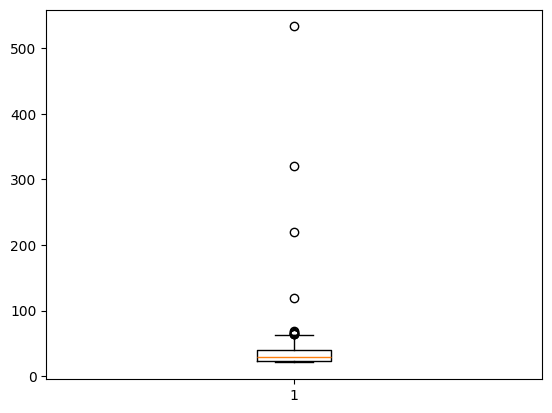

In [42]:
### 이상치 데이터 확인은 박스플롯(boxplot) 시각화를 통해 확인
# 사용할 그래프 정의
plt.boxplot(df["나이"])
# 그래프 보이기
plt.show()

In [46]:
### 이상치 데이터 확인(나이 100세 이상)
(df["나이"] >= 100).value_counts()

나이
False    416
True       4
Name: count, dtype: int64

In [48]:
### 넘파이(numpy) 라이브러리 정의
import numpy as np

In [51]:
### numpy함수를 이요해서 25% 및 75% 시점의 4 분위수 확인하기
# 결과값은 배열 형태로 2개의 값을 리턴함
q1, q3 = np.percentile(df["나이"],[25, 75])
q1, q3

(24.0, 40.0)

In [ ]:
"""
<이상치 계산공식>
 - iqr = q3 - q1
 - Max Outliers(최대) = q3 + (iqr * 1.5)
 - Min Outliers(최소) = q3 - (iqr * 1.5)
"""

In [52]:
### 박스의 높이 계산하기
iqr = q3 - q1
iqr

16.0

In [53]:
### Max Outliers 계산하기
upper_bound = q3 + (iqr * 1.5)
upper_bound

64.0

In [55]:
### Min Outliers 계산하기
lower_bound = q1 - (iqr * 1.5)
lower_bound

0.0

In [75]:
### uppper_bound lower_bound의 기준값을 초과하는 데이터 전체를 조회하기
# old = df[(df['나이'] > upper_bound) | (df['나이'] < lower_bound)]
# old

# 같은 코드
c = (df['나이'] > upper_bound) | (df['나이'] < lower_bound)
df[c]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.000000,2019-11-05 12:39,3,중랑센터,7.0,10.000000,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.000000,2019-11-28 8:35,5,상암센터 정비실,5.0,3.000000,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.000000,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.000000,1110.0,320
86,SPB-04854,2019-11-02 19:52,101,(구)합정동 주민센터,5.000000,2019-11-02 21:01,101,(구)합정동 주민센터,2.0,21.269136,2300.0,220
123,SPB-22075,2019-11-03 21:50,152,마포구민체육센터 앞,7.585859,2019-11-03 21:57,101,(구)합정동 주민센터,1.0,6.000000,970.0,69
148,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.000000,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.000000,1130.0,65
221,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.000000,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.000000,12610.0,66
294,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.000000,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.000000,1360.0,65
362,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.000000,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.000000,5600.0,65
363,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.000000,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.000000,2060.0,67


In [76]:
### 이상치 10건을 해당 컬럼의 평균값으로 대체하기
# 평균값 계산하기

age_mean = int(df[c==False]["나이"].mean())
age_mean

32

In [78]:
### 데이터프레임 복제 방식 2가지
# 첫번째 방식 : df_temp에서 변형(추가, 수정, 삭제 등)의 결과는 df에도 동일하게 적용됨.
#            : df_temp와 df는 같은 메모리 공간을 바라봄.
#            : df_temp와 df의 ㅁ[모리 주소를 가짐.
df_temp = df

# 두번째 방식 : copy()를 이용하게 되면 새로운 메모리 공간을 만들어 새로운 메모리 주소가 생성됨.
#             : : df_temp는 새로운 메모리 주소를 가짐
df_temp = df.copy()

df_temp

# v = 1 (대입연산자)
# v = pd.DataFrame() (할당연산자)
# 점(.) : 접근지정자

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.000000,12.0,1100.000000,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.000000,7.0,1420.000000,31
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.000000,10.0,2679.678218,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,2.831296,10.0,1380.000000,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.000000,10.0,1650.000000,120
...,...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.000000,11.0,2200.000000,22
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,2.831296,5.0,2679.678218,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.000000,12.0,2280.000000,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.000000,10.0,1180.000000,27


In [79]:
### 나이 컬럼의 이상치 10건에 대해서 위의 평균값으로 대체하기
df_temp = df.copy()

df_temp.loc[c, "나이"] = age_mean
df_temp

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.000000,12.0,1100.000000,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.000000,7.0,1420.000000,31
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.000000,10.0,2679.678218,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,2.831296,10.0,1380.000000,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.000000,10.0,1650.000000,32
...,...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.000000,11.0,2200.000000,22
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,2.831296,5.0,2679.678218,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.000000,12.0,2280.000000,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.000000,10.0,1180.000000,27


In [87]:
c = (df['나이'] > upper_bound) | (df['나이'] < lower_bound)
df_temp[c]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.000000,2019-11-05 12:39,3,중랑센터,7.0,10.000000,1650.0,32
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.000000,2019-11-28 8:35,5,상암센터 정비실,5.0,3.000000,280.0,32
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.000000,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.000000,1110.0,32
86,SPB-04854,2019-11-02 19:52,101,(구)합정동 주민센터,5.000000,2019-11-02 21:01,101,(구)합정동 주민센터,2.0,21.269136,2300.0,32
123,SPB-22075,2019-11-03 21:50,152,마포구민체육센터 앞,7.585859,2019-11-03 21:57,101,(구)합정동 주민센터,1.0,6.000000,970.0,32
148,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.000000,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.000000,1130.0,32
221,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.000000,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.000000,12610.0,32
294,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.000000,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.000000,1360.0,32
362,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.000000,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.000000,5600.0,32
363,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.000000,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.000000,2060.0,32


In [82]:
### 하나의 값을 저장하는 공간
# int, float, str, 기타 날짜타입 등
i = 0
f = 0.1
s = "str"

In [88]:
### 여러개의 값을 저장하는 공간
# list, tuple, dict
l = [1, "a"]
t = (1, "a")
d = {1:1, 2:"a"}

l = [df, df_temp, 1, "a"]
l = [t, d]
l

dd = {1:1, 2:t, 3:d, 4:df}
ddd = {1:{11:dd}}
ddd

{1: {11: {1: 1,
   2: (1, 'a'),
   3: {1: 1, 2: 'a'},
   4:          자전거번호              대여일시  대여소번호               대여소명  대여거치대  \
   0    SPB-23220   2019-11-01 8:48    646  장한평역 1번출구 (국민은행앞)    3.0   
   1    SPB-16216   2019-11-04 8:38    646  장한평역 1번출구 (국민은행앞)    2.0   
   2    SPB-21097   2019-11-04 8:46    646  장한평역 1번출구 (국민은행앞)    1.0   
   3    SPB-22292   2019-11-05 8:34    646  장한평역 1번출구 (국민은행앞)    1.0   
   4    SPB-07935  2019-11-05 12:29    512        뚝섬역 1번 출구 옆   11.0   
   ..         ...               ...    ...                ...    ...   
   415  SPB-12116   2019-11-15 4:22    112            극동방송국 앞    5.0   
   416  SPB-17768   2019-11-15 9:31    103         망원역 2번출구 앞   14.0   
   417  SPB-18841  2019-11-15 20:40    113       홍대입구역 2번출구 앞   24.0   
   418  SPB-24467  2019-11-15 21:55    152         마포구민체육센터 앞   18.0   
   419  SPB-17570  2019-11-15 22:16    391              정동길입구    7.0   
   
                    반납일시  반납대여소번호       반납대여소명     반납거치대  이용시간         이용거리